# creating numpy array using all images and labels


In [1]:
def get_image_label_indexs (category_index, image_paths):
    y_label_id = []
    y_label_name = []
    for image_path in image_paths:
        actual_class_name = os.path.basename(image_path).rsplit('_', 1)[0]
        for i in category_index.keys():
            if category_index[i]['name'] == actual_class_name:
                y_label_id.append(category_index[i]['id'])
                y_label_name.append(category_index[i]['name'])
    return y_label_id, y_label_name

In [2]:
import numpy as np
import os
import glob
import cv2
import sys
from PIL import Image
import tensorflow as tf

### Load the object detection module, it is mandatory.
### From where you run this code this path will be changed by that relative path. This will run smoothly from /my_codes directory
sys.path.insert(0, "../models/research/object_detection")
from object_detection.utils import ops as utils_ops

from utils import label_map_util
from utils import visualization_utils as vis_util

MODEL_NAME = 'downloaded_models/resnet101_pet_aneeq_additional_model'
PATH_TO_LABELS = MODEL_NAME + '/pet_label_map.pbtxt'
PATH_TO_TEST_IMAGES_DIR = 'test_images'
IMAGE_PATHS = glob.glob(PATH_TO_TEST_IMAGES_DIR+"/*.jpg")
PATH_TO_LABELS = MODEL_NAME + '/pet_label_map.pbtxt'

x_data = np.array([np.array(Image.open(IMAGE_PATHS[i]).resize((100, 100), Image.ANTIALIAS)) 
                   for i in range(len(IMAGE_PATHS))])

#print(x_data.shape)
x_data = x_data.reshape([x_data.shape[0], 30000])   # x_data contains flat arrays of each image (500X500X3)
x_data = x_data
#print(x_data.shape)

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
y_label_id, y_label_name = get_image_label_indexs (category_index, IMAGE_PATHS)

#print(y_label_id)
#print(y_label_name)
#print(y_label)
#np.reshape(y_label, [0, len(y_label)])

In [3]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(x_data.shape[1]) ]
#print(feat_cols[0])

df = pd.DataFrame(x_data, columns=feat_cols)
df['label'] = y_label_id
df['label'] = df['label'].apply(lambda i: str(i))
df['label_name'] = y_label_name
df['label_name'] = df['label_name'].apply(lambda i: str(i))

X, y = None, None
#print(df['label_name'])

In [4]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

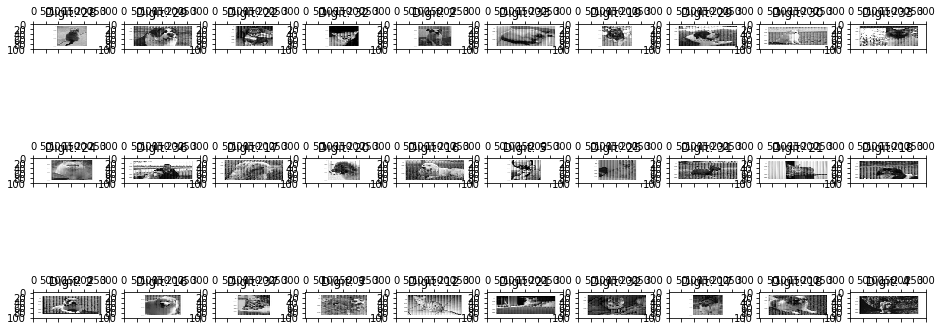

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((100, 300)).astype(float))

plt.show()

# Dimensionality reduction using PCA

In [6]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]


print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36694111 0.08266949 0.05084704]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

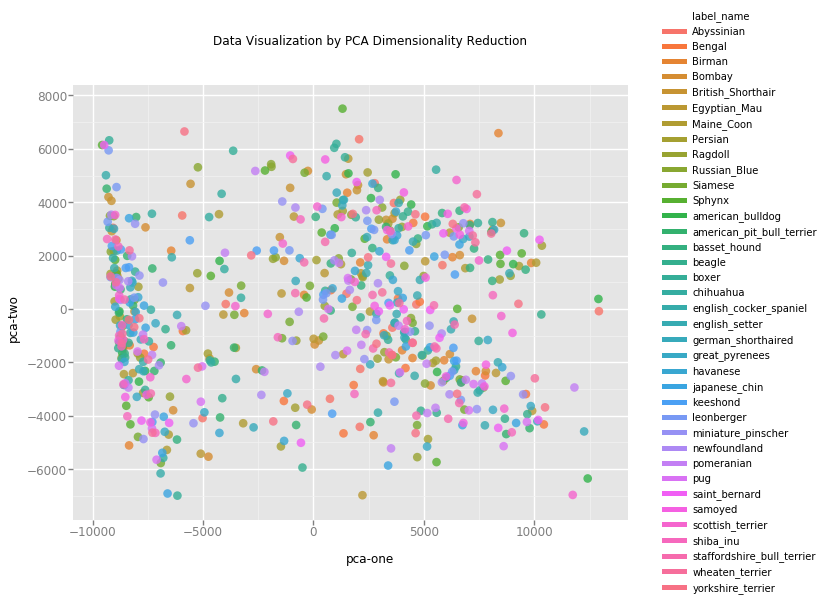

<ggplot: (-9223363291159673684)>

In [10]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label_name') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("Data Visualization by PCA Dimensionality Reduction")
chart

# T-Distributed Stochastic Neighbouring Entities (t-SNE)

In [8]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 679 samples in 1.013s...
[t-SNE] Computed neighbors for 679 samples in 45.117s...
[t-SNE] Computed conditional probabilities for sample 679 / 679
[t-SNE] Mean sigma: 2654.915065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.362801
[t-SNE] KL divergence after 300 iterations: 1.027682
t-SNE done! Time elapsed: 50.21189641952515 seconds


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

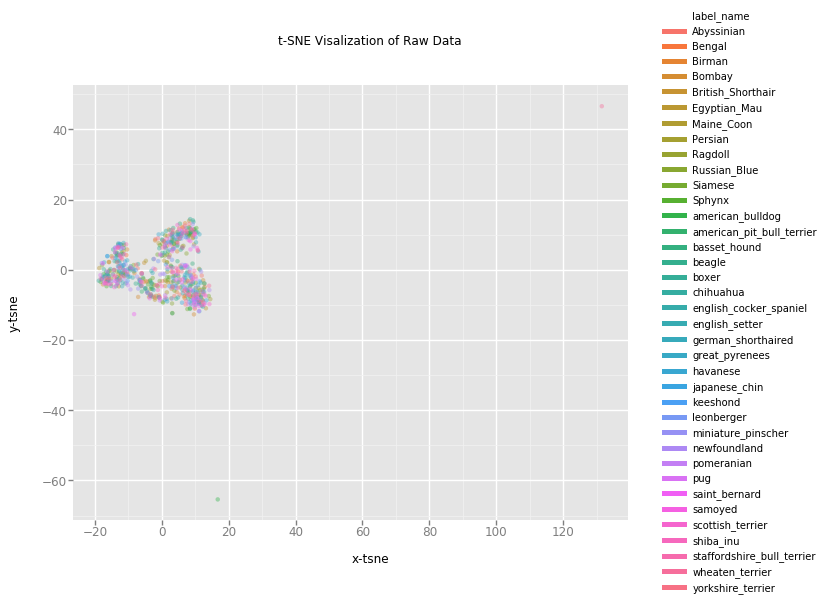

<ggplot: (8745614088491)>

In [12]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label_name' )) \
        + geom_point(size=20,alpha=0.4) \
        + ggtitle("t-SNE Visalization of Raw Data") 
chart